# DSLabs functions

In [15]:
%run "scripts/dslabs_functions.py"


# Data functions

In [1]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [2]:
import pandas as pd
import numpy as np


# filepath=r'data/df_merch_0_2024_agg_time_mv_input.csv'
filepath=r'data/df_merch_0_2024_agg_time_outlier_input.csv'

file_tag = "Google Merch Store 2024-2025"


# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.7

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Checkouts                        427 non-null    float64
 6   E-commerce purchases             427 non-null    float64
 7   Average purchase revenue         427 non-null    float64
 8   Purchase revenue                 427 non-null    float64
 9   Average session duration         427 non-null    float64
 10  ARPU                             427 non-null    float64
 11  ARPPU                            427 non-null    float64
 12  Vie

# Scale 0 - no scaling

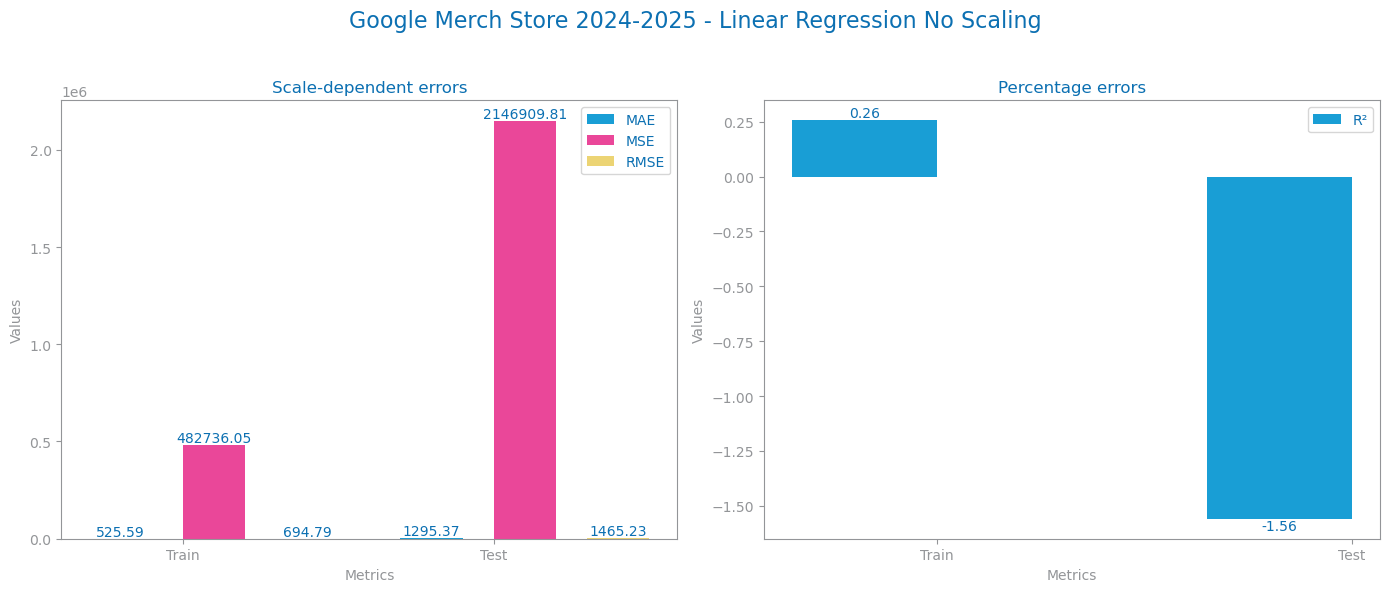

<Figure size 640x480 with 0 Axes>

In [3]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()



# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## no scaling plot

<Axes: xlabel='Date', ylabel='Sessions'>

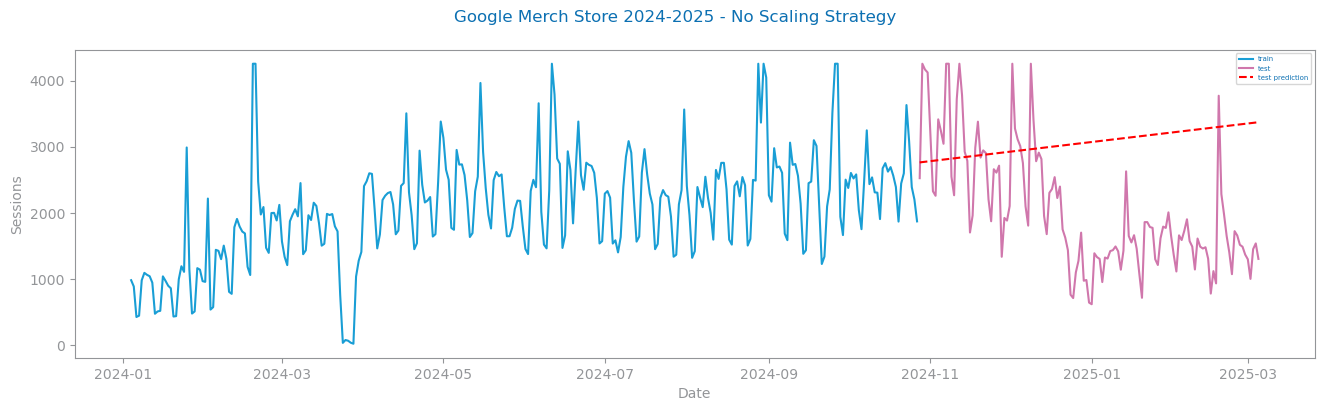

In [4]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [5]:
from sklearn.preprocessing import StandardScaler

def apply_strategy_1(df):

    df_copy=df.copy()
    
    # Apply scaling to the entire DataFrame
    transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_copy)
    df_zscore = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    
    return df_zscore


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Checkouts,E-commerce purchases,Average purchase revenue,Purchase revenue,Average session duration,...,Sessions cpc,Sessions cpm,Sessions email,Sessions organic,Sessions other,Sessions referral,season,commercial_season,is_weekend,is_holiday
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-1.267670,-2.097039,-2.200357,1.760014,0.073355,-0.141797,-0.144129,-0.345043,-0.321582,1.624147,...,-0.714669,-0.48383,-0.007360,-0.154189,-0.64263,-0.567097,-0.423466,0.323359,-0.632456,-0.170046
2024-01-05,-1.380685,-2.097039,-2.200357,1.802829,0.273239,-0.164604,0.041834,1.009162,0.317777,2.125395,...,-0.914492,-0.48383,-0.141865,-0.397203,-0.64263,-0.596842,-0.423466,0.323359,-0.632456,-0.170046
2024-01-06,-1.929104,-2.097039,-2.200357,0.713948,-0.875117,-0.791805,-1.148329,-1.001258,-1.110488,0.754697,...,-0.843966,-0.48383,-0.410874,-1.260320,-0.64263,-0.828855,-0.423466,-0.395778,1.581139,-0.170046
2024-01-07,-1.905312,-2.097039,-2.200357,1.729226,-0.698748,-0.711980,-0.850788,-1.309292,-1.070595,0.357295,...,-0.843966,-0.48383,-0.400528,-1.226801,-0.64263,-0.799109,-0.423466,-0.395778,1.581139,-0.170046
2024-01-08,-1.268860,-2.097039,-2.200357,0.980110,-0.271544,-0.518118,-0.627633,-1.008490,-0.852209,1.521984,...,-0.855721,-0.48383,-0.028053,-0.103910,-0.64263,-0.531402,-0.423466,-0.395778,-0.632456,-0.170046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-0.891747,-0.894200,-0.787817,-0.709798,-0.800650,-0.997071,-0.999559,-0.832573,-1.008560,-2.011426,...,-0.220989,-0.48383,-0.452260,-1.369257,-0.64263,-0.632536,0.528218,-0.395778,1.581139,-0.170046
2025-03-02,-1.243877,-0.909829,-0.795749,0.199544,-0.730103,-0.768998,-0.627633,-1.149883,-0.866025,-0.071010,...,0.108132,-0.48383,-0.390181,-1.017307,-0.64263,-0.674179,0.528218,-0.395778,1.581139,-0.170046
2025-03-03,-0.709733,-0.981025,-0.818314,1.356442,0.002807,0.234524,-0.218514,-0.023842,-0.260861,1.146208,...,0.648829,-0.48383,-0.069439,0.281560,-0.64263,0.212228,0.528218,-0.395778,-0.632456,-0.170046


## Scale 1 evaluate

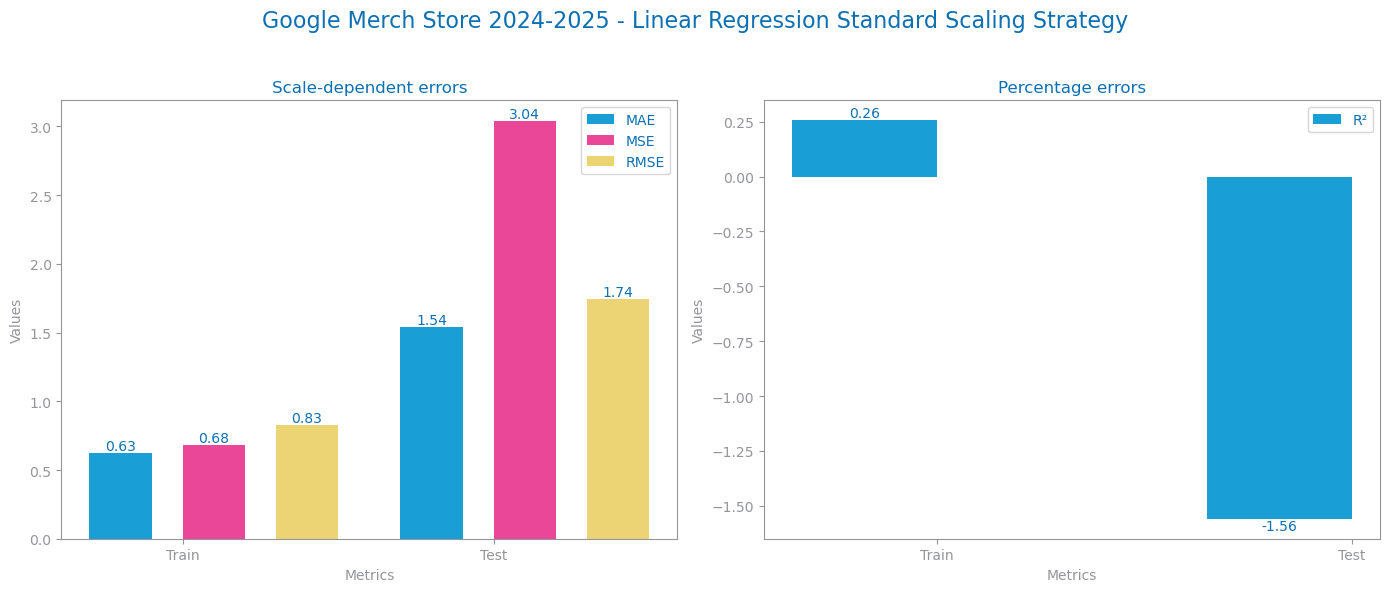

<Figure size 640x480 with 0 Axes>

In [6]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression
from numpy import arange


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(data_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Standard Scaling Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

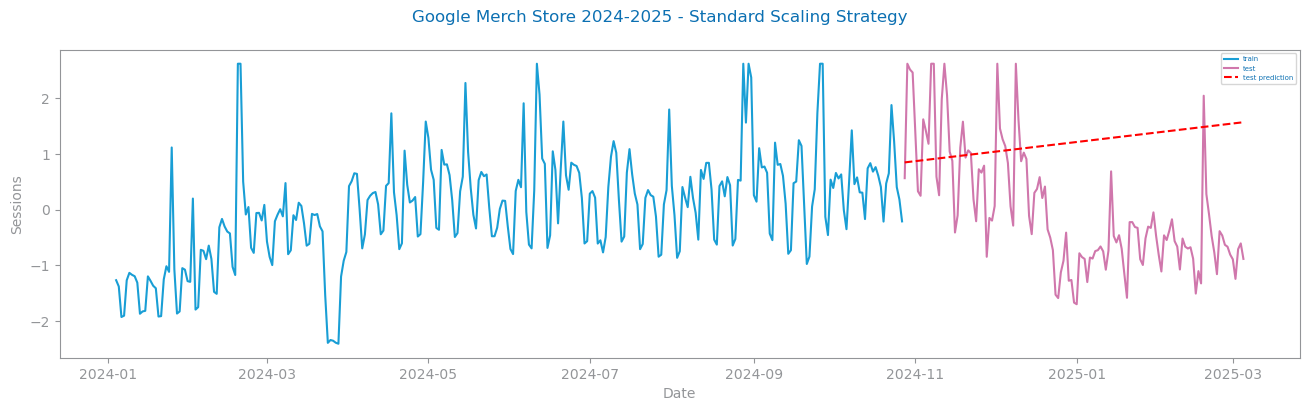

In [7]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Standard Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [8]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # Apply MinMax scaling to the entire DataFrame including the target column
    transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_copy)
    df_minmax = DataFrame(transf.transform(df_copy), index=df_copy.index, columns=df_copy.columns)
    
    
    return df_minmax

data_2=apply_strategy_2(data)

series_2: Series = data_2[target]

## Scale 2 evaluate

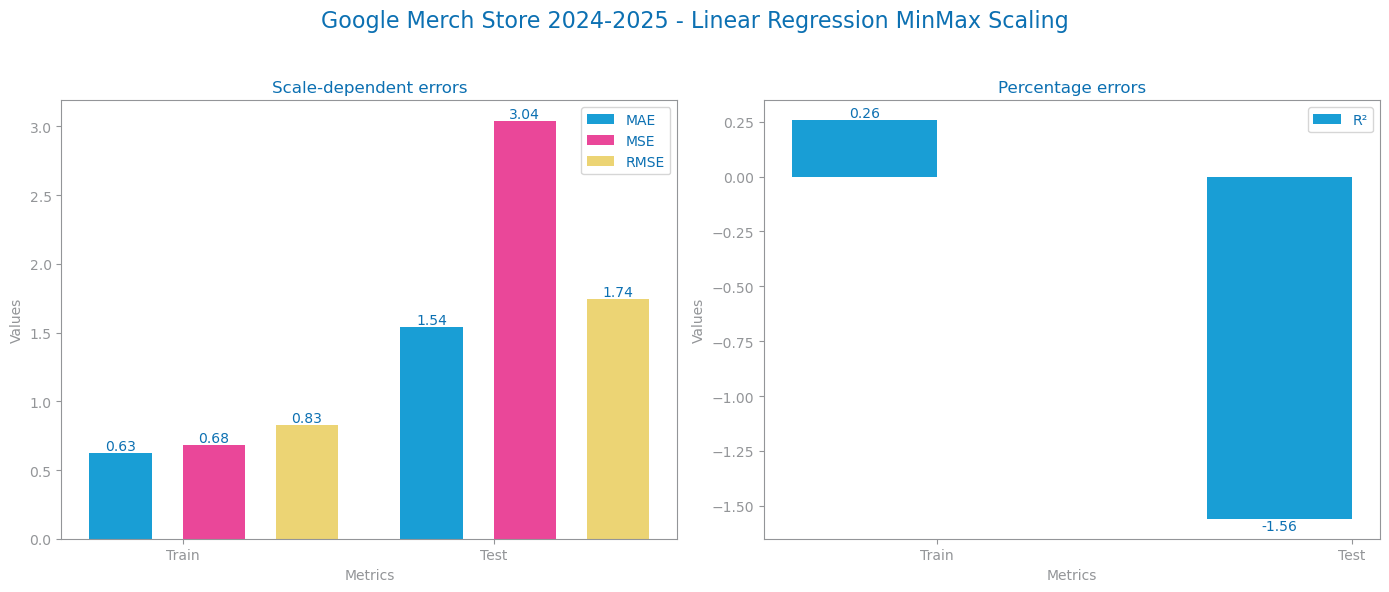

<Figure size 640x480 with 0 Axes>

In [9]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_2, test_2 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_1.index).intersection(set(test_1.index)), "Data leakage detected: Train and test sets overlap."

# Prepare the training and testing data using the time index as the feature
trnX_2 = arange(len(train_2)).reshape(-1, 1)
trnY_2 = train_2[target].to_numpy()
tstX_2 = arange(len(train_2), len(data_2)).reshape(-1, 1)
tstY_2 = test_2[target].to_numpy()

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(trnX_2, trnY_2)

# Predict the training and testing data
prd_trn_2 = Series(model_2.predict(trnX_2), index=train_2.index)
prd_tst_2 = Series(model_2.predict(tstX_2), index=test_2.index)

# Plot the forecasting evaluation
plot_single_model_evaluation(train_2[target], test_2[target], prd_trn_2, prd_tst_2, title=f"{file_tag} - Linear Regression MinMax Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Scale 2 Plot Forecast

<Axes: xlabel='Date', ylabel='Sessions'>

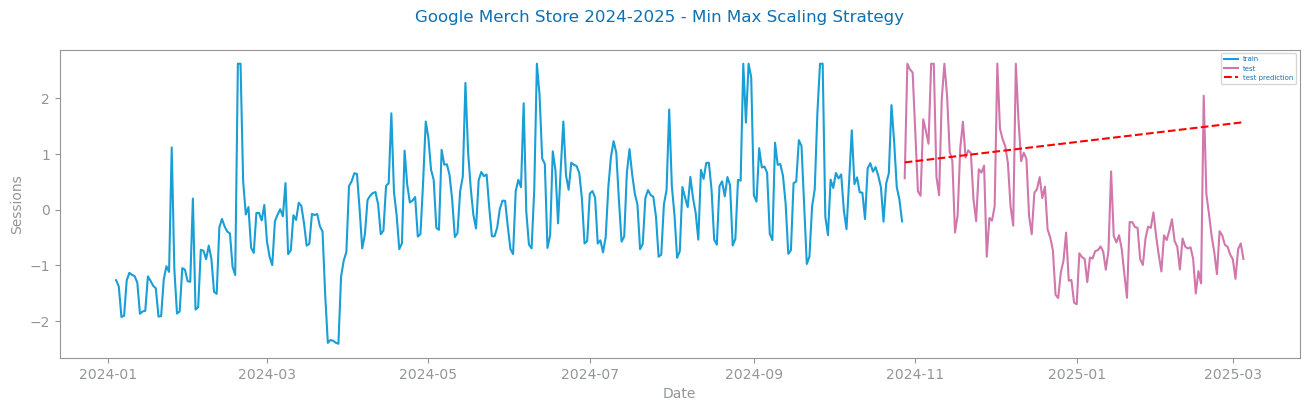

In [10]:
plot_forecasting_series(
    train_2[target],
    test_2[target],
    prd_tst_2,
    title=f"{file_tag} - Min Max Scaling Strategy",
    xlabel='Date',
    ylabel=target,
)

# scaling plot

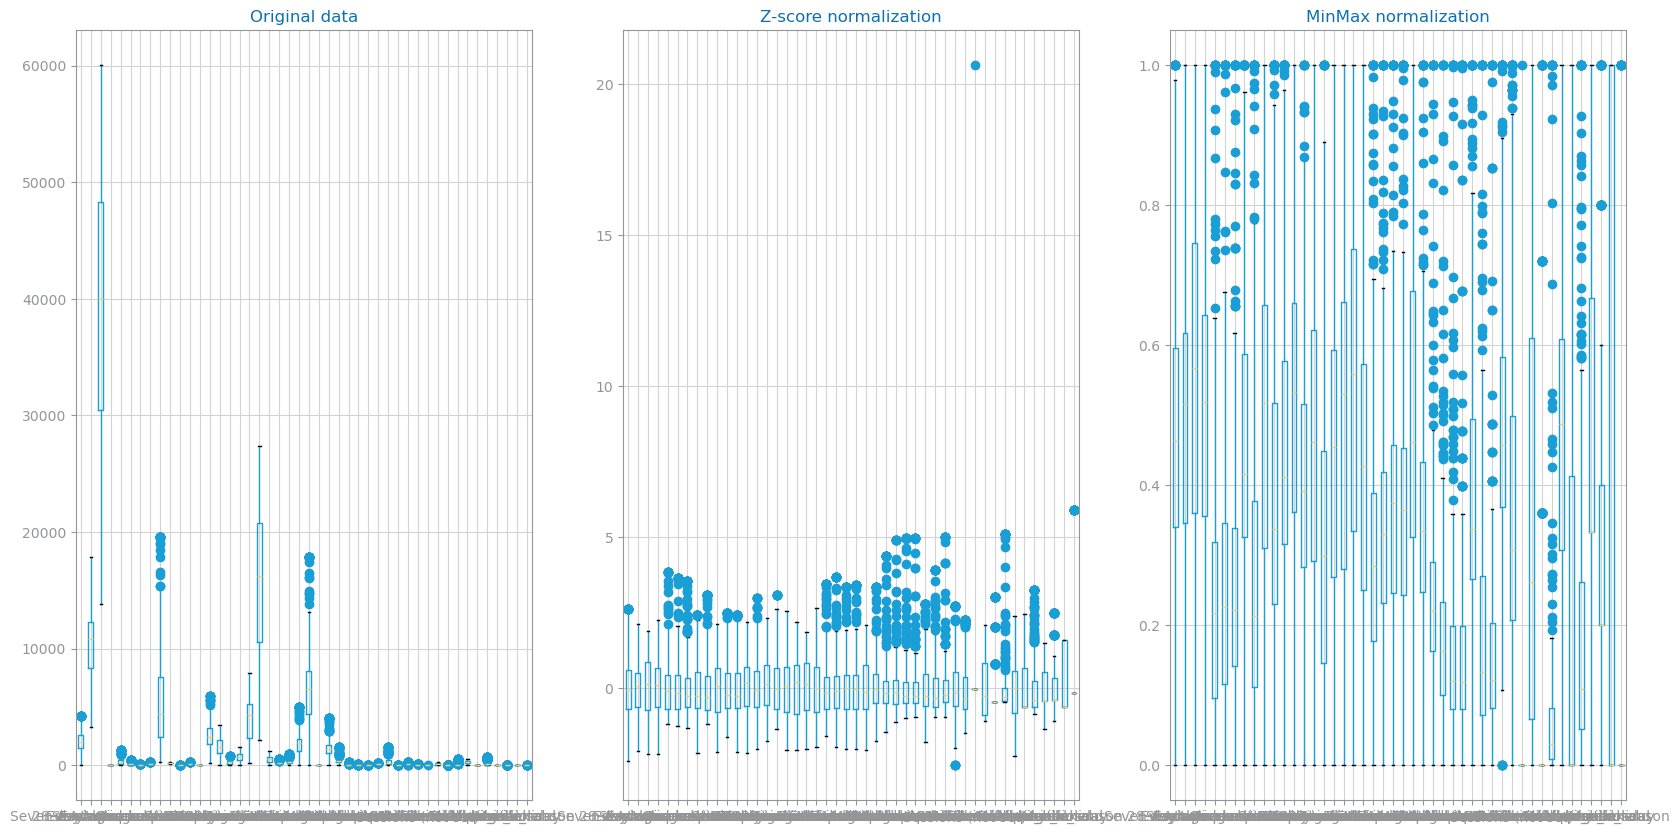

In [11]:

from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
axs[0, 0].set_title("Original data")
data.boxplot(ax=axs[0, 0])

axs[0, 1].set_title("Z-score normalization")
data_1.boxplot(ax=axs[0, 1])

axs[0, 2].set_title("MinMax normalization")
data_2.boxplot(ax=axs[0, 2])

savefig(f"images/{file_tag}_scaling_plots_evaluation.png")

show()

# Approach uplift comparison

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Scaling", "Standard Scaling", "MinMax Scaling"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
        mean_absolute_error(test_2[target], prd_tst_2)
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
        mean_squared_error(test_2[target], prd_tst_2)
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
        mean_squared_error(test_2[target], prd_tst_2, squared=False)
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
        r2_score(test_2[target], prd_tst_2)
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
        mean_absolute_percentage_error(test_2[target], prd_tst_2)
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

              Model          MAE           MSE         RMSE        R²  \
0        No Scaling  1295.372369  2.146910e+06  1465.233706 -1.559477   
1  Standard Scaling     1.541014  3.038351e+00     1.743087 -1.559477   
2    MinMax Scaling     1.541014  3.038351e+00     1.743087 -1.559477   

         MAPE  
0   92.425146  
1  311.870558  
2  311.870558  


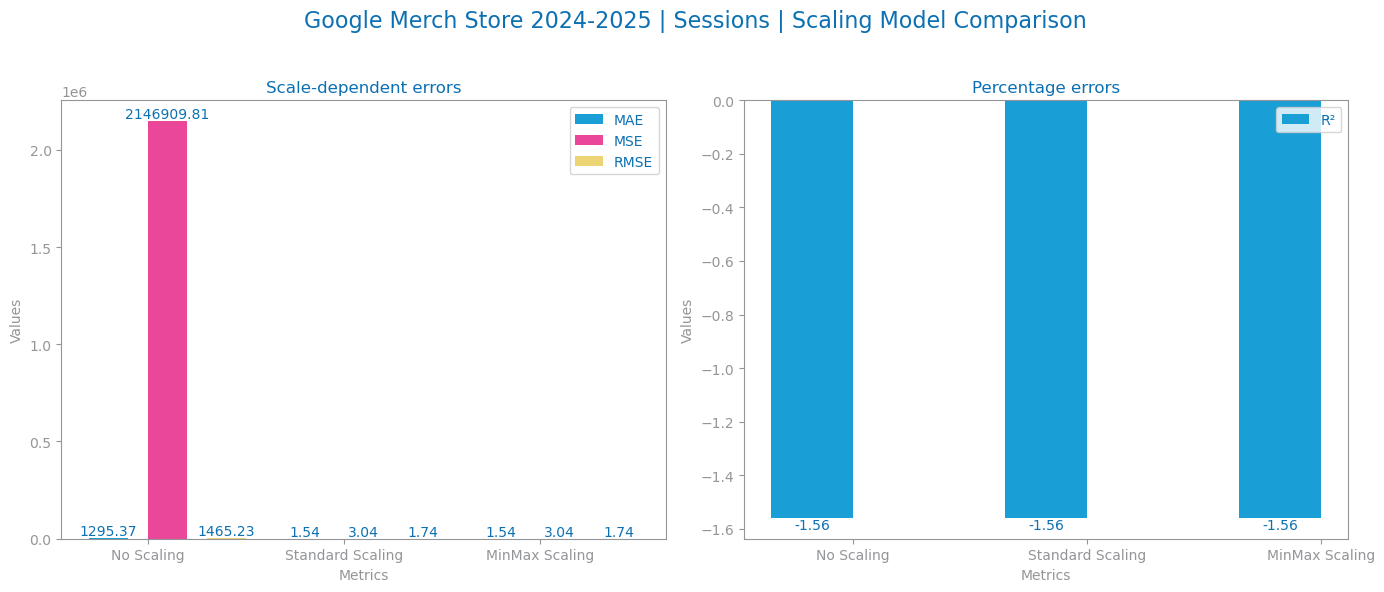

In [13]:
plot_performance_metrics(metrics, title=f"{file_tag} | {target} | Scaling Model Comparison")

# save to csv

In [14]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)

        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_scaling_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'Average session duration', 'ARPU', 'ARPPU', 'Views per user',
       'Total users', 'Promotion views', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sess